<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_07/13_timeseries_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install tsaug
!pip install -q tsaug

In [2]:
# Step 2: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tsaug import TimeWarp, AddNoise, Drift
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
# Step 3: Generate synthetic time series dataset
def generate_synthetic_timeseries(n_samples=1000, length=100):
    X = []
    y = []
    for _ in range(n_samples):
        if np.random.rand() > 0.5:
            base = np.sin(np.linspace(0, 2 * np.pi, length))
            noise = np.random.normal(0, 0.1, length)
            X.append(base + noise)
            y.append(0)
        else:
            base = np.sign(np.sin(np.linspace(0, 2 * np.pi, length)))
            noise = np.random.normal(0, 0.1, length)
            X.append(base + noise)
            y.append(1)
    return np.array(X)[..., np.newaxis], np.array(y)

X, y = generate_synthetic_timeseries()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Step 4: Time series augmentation
aug = (TimeWarp(n_speed_change=3, max_speed_ratio=2)
       * 2
       + AddNoise(scale=0.05)
       + Drift(max_drift=(0.1, 0.1)))
X_augmented = aug.augment(X_train)

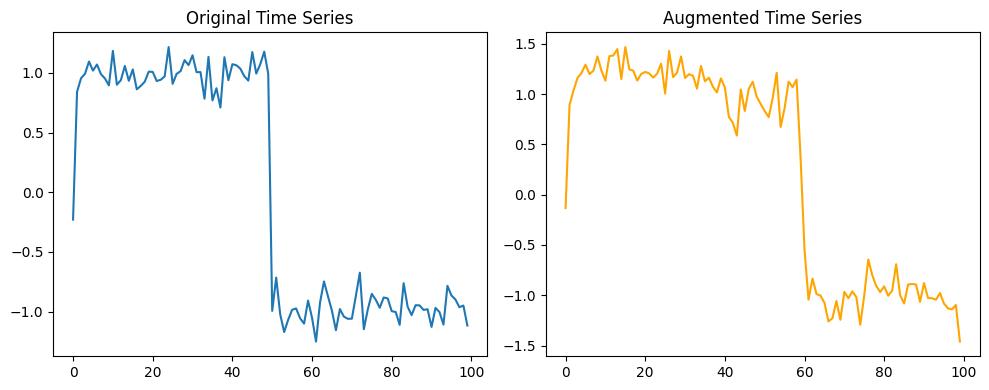

In [5]:
# Step 5: Visualize one example
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(X_train[0], label="Original")
plt.title("Original Time Series")
plt.subplot(1, 2, 2)
plt.plot(X_augmented[0], label="Augmented", color="orange")
plt.title("Augmented Time Series")
plt.tight_layout()
plt.show()

In [6]:
# Step 6: Combine for training
X_combined = np.concatenate([X_train, X_augmented])
y_combined = np.concatenate([y_train, y_train])

In [7]:
# Step 7: Define LSTM model
model = models.Sequential([
    layers.Input(shape=(X.shape[1], 1)),
    layers.LSTM(32, return_sequences=False),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
X_combined = X_combined[:1600]

In [16]:
# Step 8: Train the model
history = model.fit(X_combined, y_combined, validation_data=(X_test, y_test),
                    epochs=10, batch_size=32)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.4549 - loss: 0.6861 - val_accuracy: 0.7650 - val_loss: 0.5633
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7387 - loss: 0.6205 - val_accuracy: 1.0000 - val_loss: 0.3260
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7632 - loss: 0.5501 - val_accuracy: 1.0000 - val_loss: 0.2574
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7571 - loss: 0.5211 - val_accuracy: 1.0000 - val_loss: 0.2074
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7602 - loss: 0.5029 - val_accuracy: 1.0000 - val_loss: 0.2789
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7490 - loss: 0.5342 - val_accuracy: 1.0000 - val_loss: 0.1847
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7595 - loss: 0.5128 - val_accuracy: 1.0000 - val_loss: 0.1752
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7686 - loss: 0.4744 - val_accuracy: 1.0000 - v

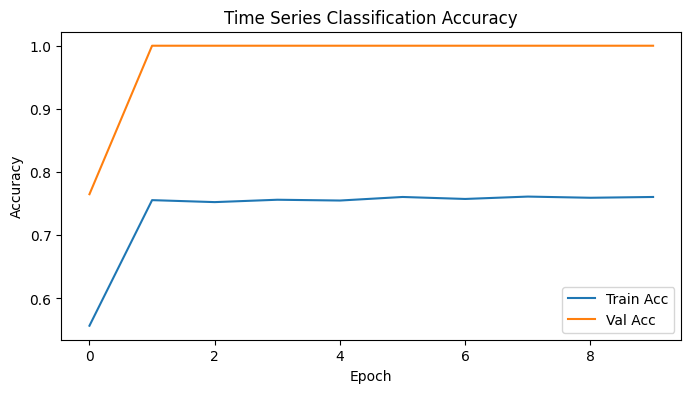

In [17]:
# Step 9: Plot accuracy
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Time Series Classification Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
